In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn. metrics import accuracy_score, confusion_matrix

In [ ]:
# Import data table

In [3]:
data = pd.read_csv('breast-cancer-data.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,symmetry_mean
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.2419
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.1812
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.2069
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2597
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1809


In [ ]:
# check for the data size

In [4]:
data.shape

(569, 9)

In [ ]:
# Check for the null values

In [5]:
data.isna().sum()

id                  0
diagnosis           0
radius_mean         0
texture_mean        0
perimeter_mean      0
area_mean           0
smoothness_mean     0
compactness_mean    0
symmetry_mean       0
dtype: int64

In [ ]:
# Check for duplicate data

In [5]:
data[data.duplicated()]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,symmetry_mean


In [ ]:
# correlation analysis

<Axes: >

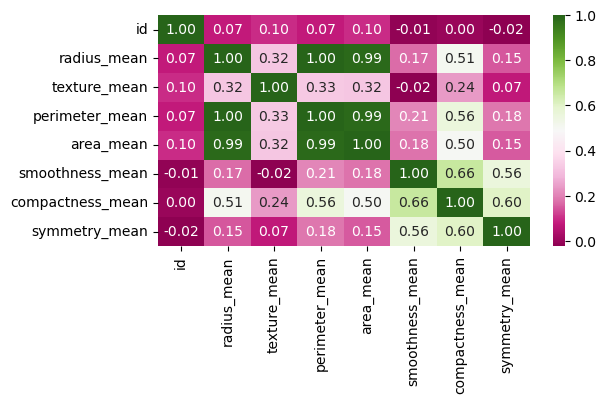

In [7]:
plt.figure(figsize=(6,3))
corr = data.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='PiYG', fmt='0.2f')

In [8]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'symmetry_mean'],
      dtype='object')

<Axes: xlabel='area_mean', ylabel='perimeter_mean'>

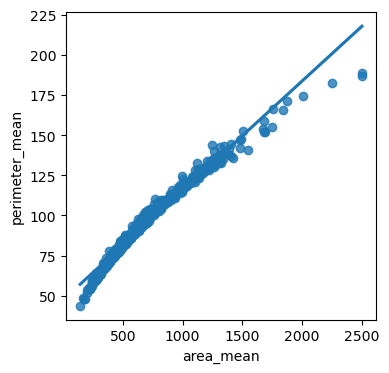

In [9]:
plt.figure(figsize=(4,4))
sns.regplot(x = 'area_mean', y = 'perimeter_mean', data = data, ci=0)

<Axes: xlabel='area_mean', ylabel='radius_mean'>

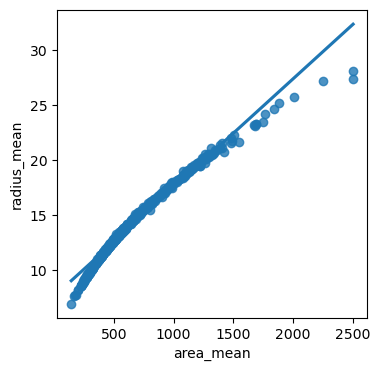

In [10]:
plt.figure(figsize=(4,4))
sns.regplot(x = 'area_mean', y = 'radius_mean', data = data, ci=0)

In [11]:
# check if the distribution of target category is unbiased !!

In [12]:
data['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [ ]:
# The target class is distributed in the ratio 60:40

In [13]:
# defining X and Y values

In [6]:
feature_cols = ['texture_mean', 'smoothness_mean', 'compactness_mean', 
                'symmetry_mean', 'perimeter_mean', 'radius_mean', 'area_mean']
X = data[feature_cols]
y = data.diagnosis

In [7]:
X.head()

,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,perimeter_mean,radius_mean,area_mean
0,10.38,0.11840,0.27760,0.2419,122.80,17.99,1001.0
1,17.77,0.08474,0.07864,0.1812,132.90,20.57,1326.0
2,21.25,0.10960,0.15990,0.2069,130.00,19.69,1203.0
3,20.38,0.14250,0.28390,0.2597,77.58,11.42,386.1
4,14.34,0.10030,0.13280,0.1809,135.10,20.29,1297.0


In [9]:
y.head()

0    M
1    M
2    M
3    M
4    M
Name: diagnosis, dtype: object

In [ ]:
# Splitting training and test data

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
X_train.shape

(398, 7)

In [12]:
X_test.shape

(171, 7)

In [20]:
# Create the Logistic Regression Model

In [13]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [14]:
pred = model.predict(X_test)
pred

array(['B', 'M', 'M', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'B',
       'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'B', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'M', 'M',
       'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'B',
       'B', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'M',
       'M', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B',
       'B', 'B', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B',
       'M', 'B'], dtype=object)

In [ ]:
# Calculate the accuracy score

In [15]:
accuracy_score(y_test, pred)

0.935672514619883

In [16]:
cm = confusion_matrix(y_test, pred)
cm

array([[103,   5],
       [  6,  57]])

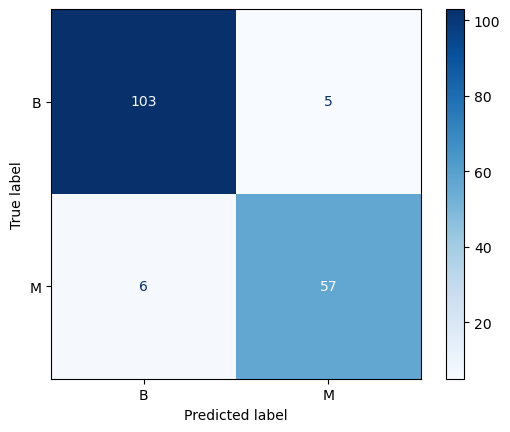

In [25]:
from sklearn.metrics import ConfusionMatrixDisplay
cmd = ConfusionMatrixDisplay(cm, display_labels=model.classes_)
cmd.plot(cmap='Blues')
plt.show()

In [20]:
model.classes_

array(['B', 'M'], dtype=object)

In [23]:
pm = float(input("Enter the perimeter mean of tissue: "))
am = float(input("Enter the area mean of the tissue: "))
rm = float(input("Enter the radius mean: "))
sm = float(input("Enter the smoothness mean: "))
Cm = float(input("Enter the compactness mean: "))
tm = float(input("Enter the texture mean: "))
sm = float(input("Enter the smoothness mean: "))
model.predict([[pm, am, rm, sm, Cm,tm,sm]])[0]

Enter the perimeter mean of tissue: 0.56
Enter the area mean of the tissue: 0.35
Enter the radius mean: 0.34
Enter the smoothness mean: 0.87
Enter the compactness mean: 0.21
Enter the texture mean: 0.48
Enter the smoothness mean: 0.30


array(['B'], dtype=object)